In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mountain-climbing-accidents-dataset/deaths_on_eight-thousanders.csv


In [3]:
import pandas as pd

In [4]:
deaths = pd.read_csv('/kaggle/input/mountain-climbing-accidents-dataset/deaths_on_eight-thousanders.csv')

In [5]:
# set seed for reproducibility
np.random.seed(0)


# set seed for reproducibility
np.random.seed(0)

In [6]:
deaths.head()

,Date,Name,Nationality,Cause of death,Mountain
0,2023-07-27,Muhammad Hassan,Pakistan,Unknown,K2
1,2022-07-22,Matthew Eakin,Australia,Fall,K2
2,2022-07-22,Richard Cartier,Canada,Fall,K2
3,2022-07-21,Ali Akbar Sakhi,Afghanistan,"Unknown, suspected altitude sickness",K2
4,2021-07-25,Rick Allen,United Kingdom,Avalanche,K2


In [7]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1078 non-null   object
 1   Name            1078 non-null   object
 2   Nationality     1076 non-null   object
 3   Cause of death  1069 non-null   object
 4   Mountain        1078 non-null   object
dtypes: object(5)
memory usage: 42.2+ KB


In [8]:
# Data Cleaning

In [9]:
# get the number of missing data points per column
missing_values_count = deaths.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date              0
Name              0
Nationality       2
Cause of death    9
Mountain          0
dtype: int64

In [10]:
# how many total missing values do we have?
total_cells = np.product(deaths.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.20408163265306123


In [11]:
# replace all NA's with 0
deaths.fillna(0, inplace=True)

In [12]:
# get the number of missing data points per column
missing_values_count = deaths.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date              0
Name              0
Nationality       0
Cause of death    0
Mountain          0
dtype: int64

In [13]:
# Convert all string columns to lowercase
for col in deaths.select_dtypes(include=['object']).columns:
    deaths[col] = deaths[col].str.lower()

In [14]:
# Converting each unique string value into a unique integer

In [15]:
import pandas as pd

# Assuming df is your DataFrame and 'date_column' is the name of your date column
deaths['Date'] = pd.to_datetime(deaths['Date'])
deaths['date_ordinal'] = deaths['Date'].apply(lambda x: x.toordinal())

# Now you can drop the original date column if you no longer need it
deaths.drop('Date', axis=1, inplace=True)

In [16]:
import pandas as pd

# Load data from a CSV file
df = pd.read_csv('/kaggle/input/mountain-climbing-accidents-dataset/deaths_on_eight-thousanders.csv')  # Make sure to replace 'path_to_your_csv/data.csv' with the actual path to your CSV file

# Perform label encoding on the 'Category' column
df['Name'] = pd.factorize(df['Name'])[0]

In [17]:
deaths

,Name,Nationality,Cause of death,Mountain,date_ordinal
0,muhammad hassan,pakistan,unknown,k2,738728
1,matthew eakin,australia,fall,k2,738358
2,richard cartier,canada,fall,k2,738358
3,ali akbar sakhi,afghanistan,"unknown, suspected altitude sickness",k2,738357
4,rick allen,united kingdom,avalanche,k2,737996
...,...,...,...,...,...
1073,ang kami sherpa,nepal,fall,mount everest,738661
1074,szilárd suhajda [hu],hungary,disappeared (reportedly suffered from hace),mount everest,738665
1075,ranjit kumar shah,nepal,disappeared,mount everest,738665
1076,pieter swart,canada,respiratory event,mount everest,738666


In [18]:
# One-Hot Encoding Categorical Variables

In [19]:
df = pd.get_dummies(df, columns=['Cause of death'])

In [20]:
df

,Date,Name,Nationality,Mountain,"Cause of death_""by fall of seracs""",Cause of death_100m fall,"Cause of death_150m fall. He showed signs of exhaustion, dehydration, cerebral oedema, retinal hemorrhages and possible blood clots in his upper legs.",Cause of death_2014 Mount Everest Avalanche,Cause of death_2014 Mount Everest ice avalanche,Cause of death_2015 Mount Everest avalanche,...,Cause of death_Suspected cardiac arrest,"Cause of death_Unclear, likely altitude sickness",Cause of death_Unknown,Cause of death_Unknown (died near Base Camp; likely a trekker as no climbing permits were issued in autumn 2021),Cause of death_Unknown (disappeared on Lhotse Shar),Cause of death_Unknown (disappeared),Cause of death_Unknown illness,"Cause of death_Unknown, suspected altitude sickness",Cause of death_Unknown.,Cause of death_Unspecified
0,2023-07-27,0,Pakistan,K2,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2022-07-22,1,Australia,K2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022-07-22,2,Canada,K2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022-07-21,3,Afghanistan,K2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2021-07-25,4,United Kingdom,K2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,2023-05-21,1049,Nepal,Mount Everest,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1074,2023-05-25,1050,Hungary,Mount Everest,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1075,2023-05-25,1051,Nepal,Mount Everest,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1076,2023-05-26,1052,Canada,Mount Everest,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# I deleted muhammad hassan so cant reversed 

In [22]:
deaths.head()

,Name,Nationality,Cause of death,Mountain,date_ordinal
0,muhammad hassan,pakistan,unknown,k2,738728
1,matthew eakin,australia,fall,k2,738358
2,richard cartier,canada,fall,k2,738358
3,ali akbar sakhi,afghanistan,"unknown, suspected altitude sickness",k2,738357
4,rick allen,united kingdom,avalanche,k2,737996


In [23]:
# The data have been cleaned 

In [24]:
# Data Visualization

In [39]:
#  The highest number of fatalities on eight thousanders.

In [35]:
# Verify Column

print(deaths.columns)

Index(['Name', 'Nationality', 'Cause of death', 'Mountain', 'date_ordinal',
       'Year'],
      dtype='object')


Index(['Date', 'Name', 'Nationality', 'Cause of death', 'Mountain'], dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


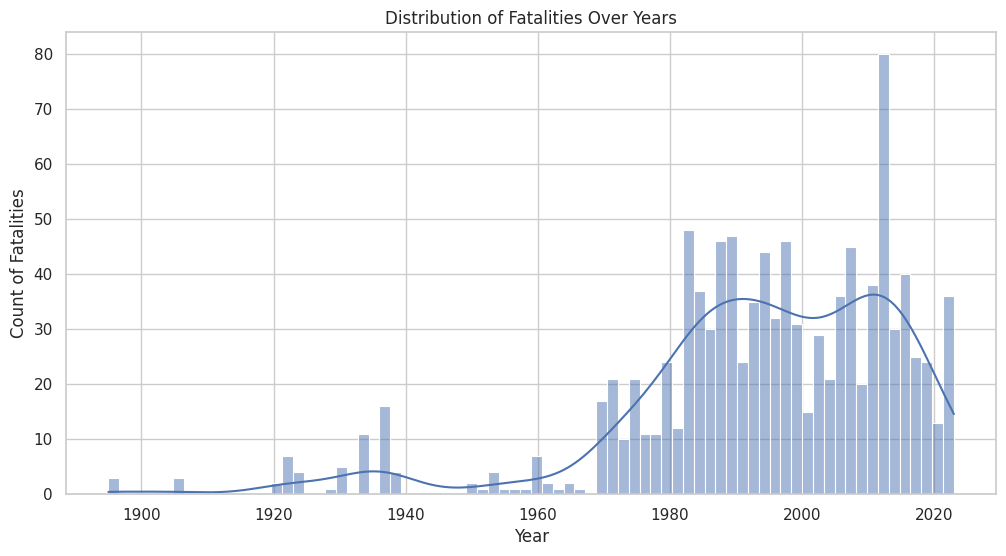

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (ensure the correct path and file name)
deaths = pd.read_csv('/kaggle/input/mountain-climbing-accidents-dataset/deaths_on_eight-thousanders.csv')  # Replace 'path_to_your_csv_file.csv' with your actual file path

# Verify the column names, especially for the date column
print(deaths.columns)

# Assuming 'Date' is the correct column name and based on your provided columns
# Ensure the 'Date' column is in datetime format
deaths['Date'] = pd.to_datetime(deaths['Date'])

# Extract the year from the 'Date' column for more readable plotting
deaths['Year'] = deaths['Date'].dt.year

# Plot using the 'Year' column
plt.figure(figsize=(12, 6))
sns.histplot(data=deaths, x='Year', bins=len(deaths['Year'].unique()), kde=True)
plt.title('Distribution of Fatalities Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Fatalities')
plt.show()

In [40]:
# Deaths by Mountain

# Compare the death rates of different climbers based on mountains.

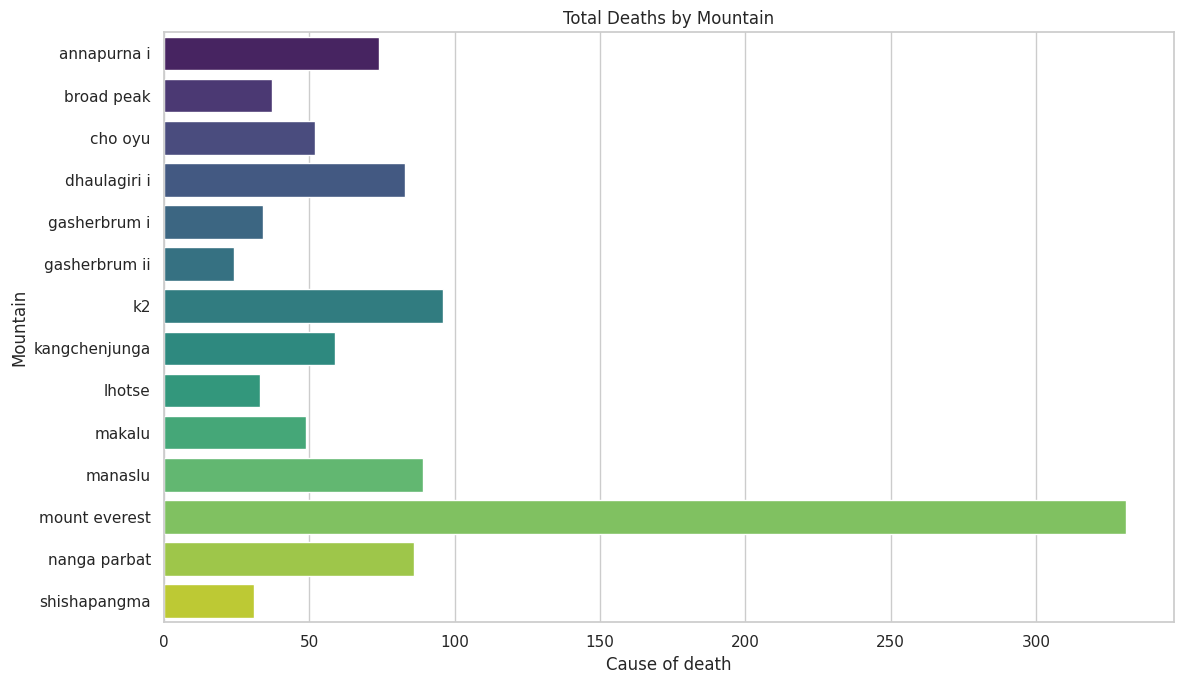

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Mountain' and count the number of deaths for each mountain
deaths_by_mountain = deaths.groupby('Mountain').size().reset_index(name='Cause of death')

# Set the visual style for better aesthetics
sns.set(style="whitegrid")

# Create a figure with custom dimensions
plt.figure(figsize=(12, 7))

# Plot a bar graph using seaborn
sns.barplot(
    x='Cause of death',  # Specify x-axis data
    y='Mountain',  # Specify y-axis data
    data=deaths_by_mountain,  # Data source
    palette='viridis'  # Color palette for visualization
)

# Add plot title and labels for readability
plt.title('Total Deaths by Mountain')  # Title of the plot
plt.xlabel('Cause of death')  # Label for the x-axis
plt.ylabel('Mountain')  # Label for the y-axis

# Rotate the x-axis labels for better readability, if needed
# plt.xticks(rotation=45)  # Uncomment if x-axis labels need rotation

# Ensure the plot layout is managed well
plt.tight_layout()

# Display the plot
plt.show()

In [46]:
# Count of Deaths by Nationality

In [45]:
deaths_by_nationality = df['Nationality'].value_counts().reset_index()
deaths_by_nationality.columns = ['Nationality', 'Count of Deaths']

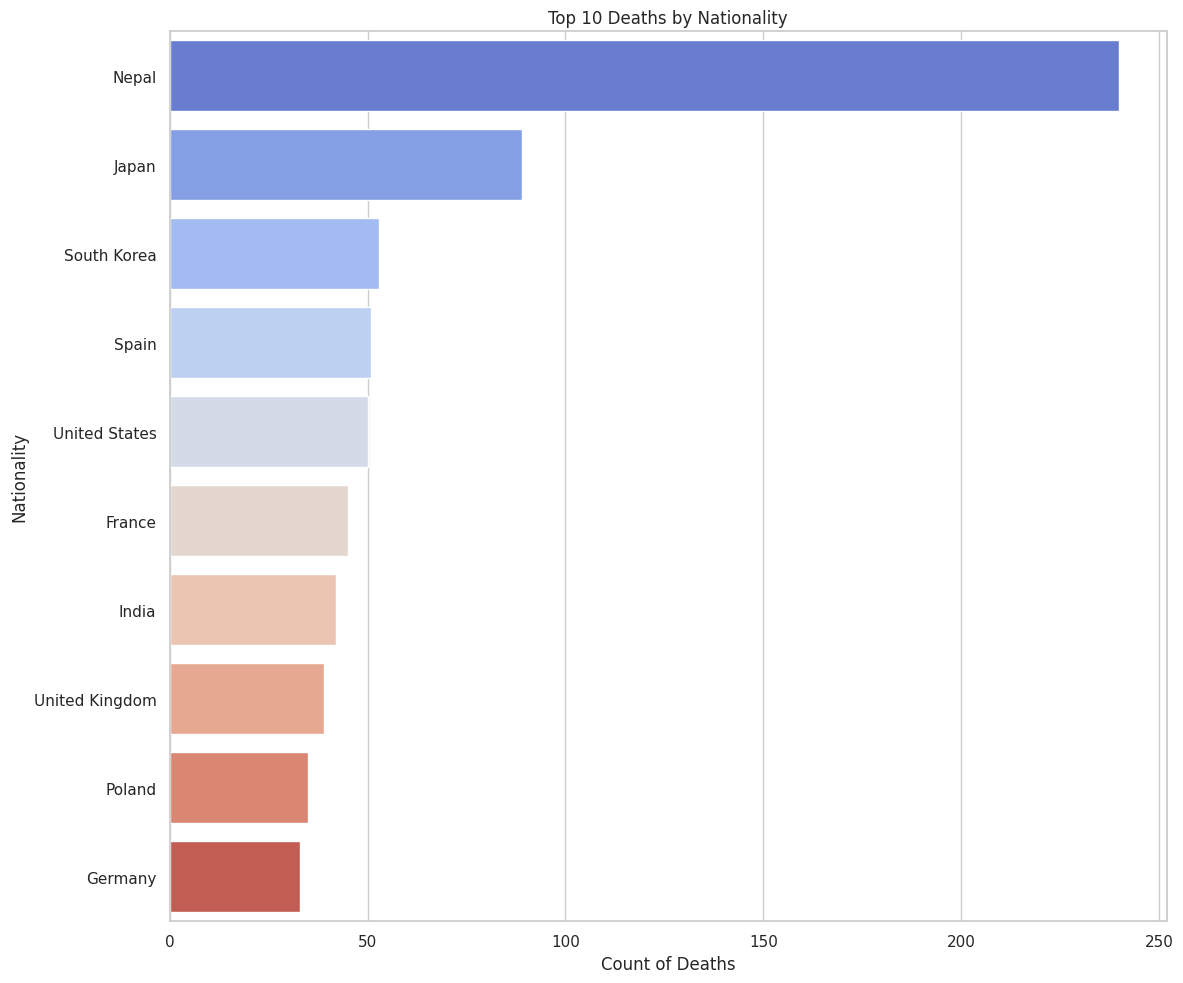

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (ensure the correct path and file name)
deaths = pd.read_csv('/kaggle/input/mountain-climbing-accidents-dataset/deaths_on_eight-thousanders.csv')  # Replace 'path_to_your_csv_file.csv' with your actual file path

# consider displaying only the top N nationalities in terms of 'Count of Deaths'
top_n = 10  # Adjust N based on your preference
top_n_nationalities = deaths_by_nationality.sort_values('Count of Deaths', ascending=False).head(top_n)

# Create the plot with adjusted size for better spacing
plt.figure(figsize=(12, 10))  # Adjusting the figure size can help with spacing
sns.barplot(
    x='Count of Deaths', 
    y='Nationality', 
    data=top_n_nationalities, 
    palette="coolwarm"  # Color palette for visualization
)

# Add titles and labels for clarity
plt.title('Top {} Deaths by Nationality'.format(top_n))
plt.xlabel('Count of Deaths')
plt.ylabel('Nationality')

# Ensure tight layout for the plot
plt.tight_layout()

# Display the plot
plt.show()